# Srijan Webinar, 29 June 2016.

# Scientific Computation and Data Visualization in Ruby

# NMatrix

In [1]:
require 'nmatrix'

true

## Create an 4x4 NMatrix containing 64 bit floating point numbers.

### Specify the shape, elements and dtype. The storage type is dense by default.

In [2]:
NMatrix.new([4,4], [1,2,3,4]*4, dtype: :float64)

#<NMatrix:0x986c654 shape:[4,4] dtype:float64 stype:dense>

### Specify the data type as `:int8` to create a matrix of 8 bit numbers.

In [3]:
n = NMatrix.new([4,4], [1,2,3,129]*4, dtype: :int8, stype: :yale)

#<NMatrix:0x9840018 shape:[4,4] dtype:int8 stype:yale capacity:17>

### Select elements with the `#[]` operator.

In [4]:
n[0,3]

-127

### You can also assign with `#[]=`.

In [5]:
n[0,1] = 56
n

#<NMatrix:0x9840018 shape:[4,4] dtype:int8 stype:yale capacity:17>

### ...but cannot expand the size of the NMatrix, unlike Ruby Array which is expandable.

In [6]:
n[0,4] = 43

RangeError: slice is larger than matrix in dimension 1 (slice component 2)

### Load the NMatrix ATLAS plugin.

ATLAS (Automatically Tuned Linear Algebra Software) is a very fast C library for linear algebra. NMatrix exposes almost all of it's functions through Ruby.

In [7]:
require 'nmatrix/atlas'

true

### Benchmark `NMatrix#dot` vs `Matrix#*` to see the difference of speed.

In [8]:
require 'matrix'

true

In [9]:
require 'benchmark/plot'

true

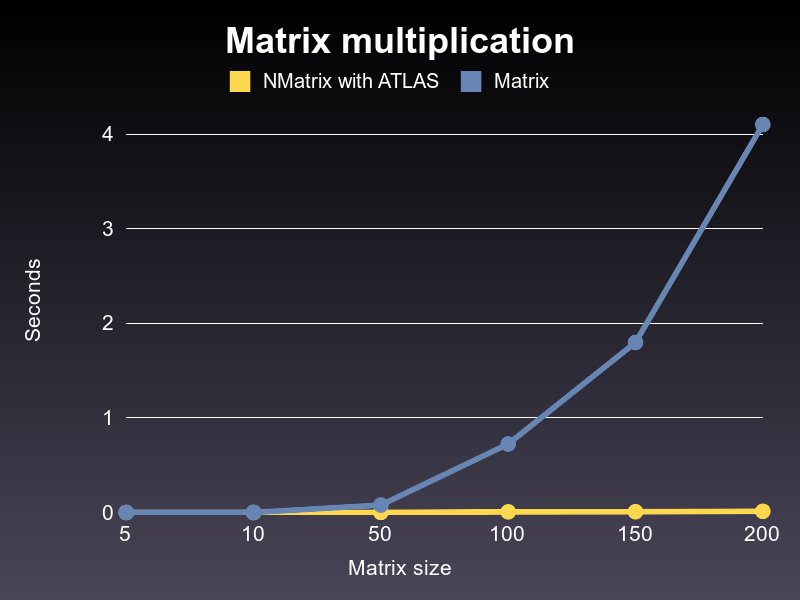

In [10]:
sizes = [5, 10, 50, 100, 150, 200]

Benchmark.plot(sizes, 
  title: "Matrix multiplication",
  file_name: "matrix_multiplication", 
  x_axis_label: "Matrix size") do |x|
    
  x.report "NMatrix with ATLAS" do |size|
    n = NMatrix.new([size,size], [1]*size*size, dtype: :float32)
    n.dot(n)
  end

  x.report "Matrix" do |size|
    n = Matrix[*[[1]*size]*size]
    n * n
  end
end

### Solving systems of linear equations with NMatrix

#### Say you have the following the three equations..

$$x + y − z = 4$$

$$x − 2y + 3z = −6$$

$$2x + 3y + z = 7$$

#### These can be expressed as the following matrices for representing co-efficients and varibles:

In [11]:
coeffs = NMatrix.new([3,3],
  [1, 1,-1,
   1,-2, 3,
   2, 3, 1], dtype: :float32)

#<NMatrix:0x98e5b30 shape:[3,3] dtype:float32 stype:dense>

In [12]:
rhs = NMatrix.new([3,1],
  [4,
  -6,
   7], dtype: :float32)

#<NMatrix:0x98a3500 shape:[3,1] dtype:float32 stype:dense>

#### Compute the solution with NMatrix#solve method. Uses the ATLAS xGESV function internally.

In [13]:
solution = coeffs.solve(rhs)

#<NMatrix:0x986c1b8 shape:[3,1] dtype:float32 stype:dense>


# Nyaplot

In [14]:
require 'nyaplot'

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

true

## Plot a simple line graph of a sine function.

In [15]:
x = Array.new(360) {|i| i}
y = x.map { |i| Math::sin(i*Math::PI/180)}

p = Nyaplot::Plot.new
p.add(:line, x, y)
p.show

#<Nyaplot::Frame:0x9bf74cc @properties={:panes=>[#<Nyaplot::Plot:0x9c25ebc @properties={:diagrams=>[#<Nyaplot::Diagram:0x9bf7bac @properties={:type=>:line, :options=>{:x=>"data0", :y=>"data1"}, :data=>"6de4b71b-5c40-47e9-b7d1-1d53feb3aad5"}, @xrange=[0, 359], @yrange=[-1.0, 1.0]>], :options=>{:zoom=>true, :width=>700, :xrange=>[0, 359], :yrange=>[-1.0, 1.0]}}>], :data=>{"6de4b71b-5c40-47e9-b7d1-1d53feb3aad5"=>#<Nyaplot::DataFrame:0x9c25ac0 @name="6de4b71b-5c40-47e9-b7d1-1d53feb3aad5", @rows=[{:data0=>0, :data1=>0.0}, {:data0=>1, :data1=>0.01745240643728351}, {:data0=>2, :data1=>0.03489949670250097}, {:data0=>3, :data1=>0.05233595624294383}, {:data0=>4, :data1=>0.0697564737441253}, {:data0=>5, :data1=>0.08715574274765817}, {:data0=>6, :data1=>0.10452846326765346}, {:data0=>7, :data1=>0.12186934340514748}, {:data0=>8, :data1=>0.13917310096006544}, {:data0=>9, :data1=>0.15643446504023087}, {:data0=>10, :data1=>0.17364817766693033}, {:data0=>11, :data1=>0.1908089953765448}, {:data0=>12, :data1=>0.20791169081775931}, {:data0=>13, :data1=>0.224951054343865}, {:data0=>14, :data1=>0.24192189559966773}, {:data0=>15, :data1=>0.25881904510252074}, {:data0=>16, :data1=>0.27563735581699916}, {:data0=>17, :data1=>0.29237170472273677}, {:data0=>18, :data1=>0.3090169943749474}, {:data0=>19, :data1=>0.32556815445715664}, {:data0=>20, :data1=>0.3420201433256687}, {:data0=>21, :data1=>0.35836794954530027}, {:data0=>22, :data1=>0.374606593415912}, {:data0=>23, :data1=>0.3907311284892737}, {:data0=>24, :data1=>0.40673664307580015}, {:data0=>25, :data1=>0.42261826174069944}, {:data0=>26, :data1=>0.4383711467890774}, {:data0=>27, :data1=>0.45399049973954675}, {:data0=>28, :data1=>0.4694715627858908}, {:data0=>29, :data1=>0.48480962024633706}, {:data0=>30, :data1=>0.49999999999999994}, {:data0=>31, :data1=>0.5150380749100542}, {:data0=>32, :data1=>0.5299192642332049}, {:data0=>33, :data1=>0.5446390350150271}, {:data0=>34, :data1=>0.5591929034707469}, {:data0=>35, :data1=>0.573576436351046}, {:data0=>36, :data1=>0.5877852522924731}, {:data0=>37, :data1=>0.6018150231520483}, {:data0=>38, :data1=>0.6156614753256582}, {:data0=>39, :data1=>0.6293203910498374}, {:data0=>40, :data1=>0.6427876096865393}, {:data0=>41, :data1=>0.6560590289905072}, {:data0=>42, :data1=>0.6691306063588582}, {:data0=>43, :data1=>0.6819983600624985}, {:data0=>44, :data1=>0.6946583704589973}, {:data0=>45, :data1=>0.7071067811865475}, {:data0=>46, :data1=>0.7193398003386511}, {:data0=>47, :data1=>0.7313537016191705}, {:data0=>48, :data1=>0.7431448254773941}, {:data0=>49, :data1=>0.754709580222772}, {:data0=>50, :data1=>0.766044443118978}, {:data0=>51, :data1=>0.7771459614569708}, {:data0=>52, :data1=>0.788010753606722}, {:data0=>53, :data1=>0.7986355100472928}, {:data0=>54, :data1=>0.8090169943749475}, {:data0=>55, :data1=>0.8191520442889918}, {:data0=>56, :data1=>0.8290375725550417}, {:data0=>57, :data1=>0.8386705679454239}, {:data0=>58, :data1=>0.848048096156426}, {:data0=>59, :data1=>0.8571673007021122}, {:data0=>60, :data1=>0.8660254037844386}, {:data0=>61, :data1=>0.8746197071393957}, {:data0=>62, :data1=>0.8829475928589269}, {:data0=>63, :data1=>0.8910065241883678}, {:data0=>64, :data1=>0.898794046299167}, {:data0=>65, :data1=>0.9063077870366499}, {:data0=>66, :data1=>0.9135454576426009}, {:data0=>67, :data1=>0.9205048534524403}, {:data0=>68, :data1=>0.9271838545667874}, {:data0=>69, :data1=>0.9335804264972017}, {:data0=>70, :data1=>0.9396926207859083}, {:data0=>71, :data1=>0.9455185755993167}, {:data0=>72, :data1=>0.9510565162951535}, {:data0=>73, :data1=>0.9563047559630354}, {:data0=>74, :data1=>0.9612616959383189}, {:data0=>75, :data1=>0.9659258262890683}, {:data0=>76, :data1=>0.9702957262759965}, {:data0=>77, :data1=>0.9743700647852352}, {:data0=>78, :data1=>0.9781476007338056}, {:data0=>79, :data1=>0.981627183447664}, {:data0=>80, :data1=>0.984807753012208}, {:data0=>81, :data1=>0.9876883405951378}, {:data0=>82, :data1=>0.9902680687415703}, {:data0=>83, :data1=>0.99254615

## Plot multiple line and scatter plots on the same diagram with legend.

In [16]:
# Curate data
x = Array.new(360) {|i| i}
siny = x.map { |i| Math::sin(i*Math::PI/180) }
cosy = x.map { |i| Math::cos(i*Math::PI/180) }

# Plot this
p = Nyaplot::Plot.new
p.add(:line, x, siny).color("#FF0000").title("SINE WAVE")
p.add(:scatter, x, cosy).color("#00FF00").title("COSINE WAVE")
p.legend true
p.show

#<Nyaplot::Frame:0x99a8e00 @properties={:panes=>[#<Nyaplot::Plot:0x9b40d80 @properties={:diagrams=>[#<Nyaplot::Diagram:0x99d3d6c @properties={:type=>:line, :options=>{:x=>"data0", :y=>"data1", :color=>"#FF0000", :title=>"SINE WAVE"}, :data=>"49f519d9-07ed-42ee-a6b6-0f8b9e6adcd7"}, @xrange=[0, 359], @yrange=[-1.0, 1.0]>, #<Nyaplot::Diagram:0x99a93dc @properties={:type=>:scatter, :options=>{:x=>"data0", :y=>"data1", :color=>"#00FF00", :title=>"COSINE WAVE"}, :data=>"d137b37d-ee21-43c0-9882-b4c8bd555098"}, @xrange=[0, 359], @yrange=[-1.0, 1.0]>], :options=>{:legend=>true, :zoom=>true, :width=>800, :xrange=>[0, 359], :yrange=>[-1.0, 1.0]}}>], :data=>{"49f519d9-07ed-42ee-a6b6-0f8b9e6adcd7"=>#<Nyaplot::DataFrame:0x9b406c8 @name="49f519d9-07ed-42ee-a6b6-0f8b9e6adcd7", @rows=[{:data0=>0, :data1=>0.0}, {:data0=>1, :data1=>0.01745240643728351}, {:data0=>2, :data1=>0.03489949670250097}, {:data0=>3, :data1=>0.05233595624294383}, {:data0=>4, :data1=>0.0697564737441253}, {:data0=>5, :data1=>0.08715574274765817}, {:data0=>6, :data1=>0.10452846326765346}, {:data0=>7, :data1=>0.12186934340514748}, {:data0=>8, :data1=>0.13917310096006544}, {:data0=>9, :data1=>0.15643446504023087}, {:data0=>10, :data1=>0.17364817766693033}, {:data0=>11, :data1=>0.1908089953765448}, {:data0=>12, :data1=>0.20791169081775931}, {:data0=>13, :data1=>0.224951054343865}, {:data0=>14, :data1=>0.24192189559966773}, {:data0=>15, :data1=>0.25881904510252074}, {:data0=>16, :data1=>0.27563735581699916}, {:data0=>17, :data1=>0.29237170472273677}, {:data0=>18, :data1=>0.3090169943749474}, {:data0=>19, :data1=>0.32556815445715664}, {:data0=>20, :data1=>0.3420201433256687}, {:data0=>21, :data1=>0.35836794954530027}, {:data0=>22, :data1=>0.374606593415912}, {:data0=>23, :data1=>0.3907311284892737}, {:data0=>24, :data1=>0.40673664307580015}, {:data0=>25, :data1=>0.42261826174069944}, {:data0=>26, :data1=>0.4383711467890774}, {:data0=>27, :data1=>0.45399049973954675}, {:data0=>28, :data1=>0.4694715627858908}, {:data0=>29, :data1=>0.48480962024633706}, {:data0=>30, :data1=>0.49999999999999994}, {:data0=>31, :data1=>0.5150380749100542}, {:data0=>32, :data1=>0.5299192642332049}, {:data0=>33, :data1=>0.5446390350150271}, {:data0=>34, :data1=>0.5591929034707469}, {:data0=>35, :data1=>0.573576436351046}, {:data0=>36, :data1=>0.5877852522924731}, {:data0=>37, :data1=>0.6018150231520483}, {:data0=>38, :data1=>0.6156614753256582}, {:data0=>39, :data1=>0.6293203910498374}, {:data0=>40, :data1=>0.6427876096865393}, {:data0=>41, :data1=>0.6560590289905072}, {:data0=>42, :data1=>0.6691306063588582}, {:data0=>43, :data1=>0.6819983600624985}, {:data0=>44, :data1=>0.6946583704589973}, {:data0=>45, :data1=>0.7071067811865475}, {:data0=>46, :data1=>0.7193398003386511}, {:data0=>47, :data1=>0.7313537016191705}, {:data0=>48, :data1=>0.7431448254773941}, {:data0=>49, :data1=>0.754709580222772}, {:data0=>50, :data1=>0.766044443118978}, {:data0=>51, :data1=>0.7771459614569708}, {:data0=>52, :data1=>0.788010753606722}, {:data0=>53, :data1=>0.7986355100472928}, {:data0=>54, :data1=>0.8090169943749475}, {:data0=>55, :data1=>0.8191520442889918}, {:data0=>56, :data1=>0.8290375725550417}, {:data0=>57, :data1=>0.8386705679454239}, {:data0=>58, :data1=>0.848048096156426}, {:data0=>59, :data1=>0.8571673007021122}, {:data0=>60, :data1=>0.8660254037844386}, {:data0=>61, :data1=>0.8746197071393957}, {:data0=>62, :data1=>0.8829475928589269}, {:data0=>63, :data1=>0.8910065241883678}, {:data0=>64, :data1=>0.898794046299167}, {:data0=>65, :data1=>0.9063077870366499}, {:data0=>66, :data1=>0.9135454576426009}, {:data0=>67, :data1=>0.9205048534524403}, {:data0=>68, :data1=>0.9271838545667874}, {:data0=>69, :data1=>0.9335804264972017}, {:data0=>70, :data1=>0.9396926207859083}, {:data0=>71, :data1=>0.9455185755993167}, {:data0=>72, :data1=>0.9510565162951535}, {:data0=>73, :data1=>0.9563047559630354}, {:data0=>74, :data1=>0.9612616959383189}, {:data0=>75, :data1=>0.9659258262890683}, {:data0=>76, :data1=>0.9702957262759965},

## Plot bar graph and histogram separately but filter the X axis of the line graph.

In [17]:
# Curate dat
require 'countries'
data = {
  :band => [],
  :popularity => [],
  :country => []
  }
bands = ['Metallica', 'Megadeth', 'Iron Maiden', 'Porcupine Tree']
countries = ISO3166::Country.find_all_countries_by_region('Asia')
50.times do |idx|
  data[:band] << bands.sample
  data[:popularity] << rand(100)
  data[:country] << countries[idx].name
end

df = Nyaplot::DataFrame.new(data)

#<Nyaplot::DataFrame:0xa6042bc @name="dc5d9c60-bbe6-4011-9135-2c666eea8683", @rows=[{:band=>"Porcupine Tree", :popularity=>33, :country=>"United Arab Emirates"}, {:band=>"Porcupine Tree", :popularity=>11, :country=>"Afghanistan"}, {:band=>"Metallica", :popularity=>40, :country=>"Armenia"}, {:band=>"Porcupine Tree", :popularity=>32, :country=>"Azerbaijan"}, {:band=>"Iron Maiden", :popularity=>52, :country=>"Bangladesh"}, {:band=>"Megadeth", :popularity=>35, :country=>"Bahrain"}, {:band=>"Megadeth", :popularity=>31, :country=>"Brunei Darussalam"}, {:band=>"Megadeth", :popularity=>77, :country=>"Bhutan"}, {:band=>"Megadeth", :popularity=>34, :country=>"China"}, {:band=>"Megadeth", :popularity=>51, :country=>"Cyprus"}, {:band=>"Porcupine Tree", :popularity=>18, :country=>"Georgia"}, {:band=>"Metallica", :popularity=>81, :country=>"Hong Kong"}, {:band=>"Metallica", :popularity=>68, :country=>"Indonesia"}, {:band=>"Porcupine Tree", :popularity=>90, :country=>"Israel"}, {:band=>"Metallica", :popularity=>83, :country=>"India"}, {:band=>"Porcupine Tree", :popularity=>84, :country=>"Iraq"}, {:band=>"Porcupine Tree", :popularity=>8, :country=>"Iran, Islamic Republic Of"}, {:band=>"Porcupine Tree", :popularity=>2, :country=>"Jordan"}, {:band=>"Megadeth", :popularity=>81, :country=>"Japan"}, {:band=>"Metallica", :popularity=>97, :country=>"Kyrgyzstan"}, {:band=>"Metallica", :popularity=>14, :country=>"Cambodia"}, {:band=>"Porcupine Tree", :popularity=>55, :country=>"Korea, Democratic People's Republic Of"}, {:band=>"Metallica", :popularity=>6, :country=>"Korea, Republic of"}, {:band=>"Iron Maiden", :popularity=>20, :country=>"Kuwait"}, {:band=>"Megadeth", :popularity=>80, :country=>"Kazakhstan"}, {:band=>"Porcupine Tree", :popularity=>99, :country=>"Lao People's Democratic Republic"}, {:band=>"Megadeth", :popularity=>58, :country=>"Lebanon"}, {:band=>"Iron Maiden", :popularity=>62, :country=>"Sri Lanka"}, {:band=>"Porcupine Tree", :popularity=>61, :country=>"Myanmar"}, {:band=>"Iron Maiden", :popularity=>10, :country=>"Mongolia"}, {:band=>"Metallica", :popularity=>98, :country=>"Macao"}, {:band=>"Megadeth", :popularity=>39, :country=>"Maldives"}, {:band=>"Porcupine Tree", :popularity=>84, :country=>"Malaysia"}, {:band=>"Porcupine Tree", :popularity=>54, :country=>"Nepal"}, {:band=>"Megadeth", :popularity=>62, :country=>"Oman"}, {:band=>"Porcupine Tree", :popularity=>94, :country=>"Philippines"}, {:band=>"Iron Maiden", :popularity=>38, :country=>"Pakistan"}, {:band=>"Megadeth", :popularity=>34, :country=>"Palestine, State of"}, {:band=>"Metallica", :popularity=>99, :country=>"Qatar"}, {:band=>"Iron Maiden", :popularity=>97, :country=>"Saudi Arabia"}, {:band=>"Porcupine Tree", :popularity=>62, :country=>"Singapore"}, {:band=>"Iron Maiden", :popularity=>83, :country=>"Syrian Arab Republic"}, {:band=>"Iron Maiden", :popularity=>92, :country=>"Thailand"}, {:band=>"Porcupine Tree", :popularity=>19, :country=>"Tajikistan"}, {:band=>"Porcupine Tree", :popularity=>24, :country=>"Timor-Leste"}, {:band=>"Porcupine Tree", :popularity=>33, :country=>"Turkmenistan"}, {:band=>"Iron Maiden", :popularity=>99, :country=>"Turkey"}, {:band=>"Metallica", :popularity=>95, :country=>"Taiwan, Republic Of China"}, {:band=>"Metallica", :popularity=>23, :country=>"Uzbekistan"}, {:band=>"Porcupine Tree", :popularity=>92, :country=>"Vietnam"}]>

In [18]:
# Histogram
popularity = Nyaplot::Plot.new
popularity.add_with_df(df, :histogram, :popularity)
popularity.configure do
  x_label('Popularity')
  y_label('Frequency')
  filter({target:'x'})
  yrange([0,10])
end

# Bar Graph
band = Nyaplot::Plot.new
band.add_with_df(df, :bar, :band)
band.configure do
  x_label('Band name')
  y_label('Frequency')
end

frame = Nyaplot::Frame.new
frame.add(popularity)
frame.add(band)
frame.show

#<Nyaplot::Frame:0xa3772ec @properties={:panes=>[#<Nyaplot::Plot:0xa377a1c @properties={:diagrams=>[#<Nyaplot::Diagram:0xa377940 @properties={:type=>:histogram, :options=>{:value=>:popularity}, :data=>"dc5d9c60-bbe6-4011-9135-2c666eea8683"}, @xrange=[0, 99], @yrange=[0, 50]>], :options=>{:x_label=>"Popularity", :y_label=>"Frequency", :yrange=>[0, 10], :width=>700, :xrange=>[0, 99]}, :filter=>{:target=>"x"}}>, #<Nyaplot::Plot:0xa377634 @properties={:diagrams=>[#<Nyaplot::Diagram:0xa377558 @properties={:type=>:bar, :options=>{:value=>:band}, :data=>"dc5d9c60-bbe6-4011-9135-2c666eea8683"}, @xrange=["Porcupine Tree", "Metallica", "Iron Maiden", "Megadeth"], @yrange=[0, 50]>], :options=>{:x_label=>"Band name", :y_label=>"Frequency", :width=>700, :xrange=>["Porcupine Tree", "Metallica", "Iron Maiden", "Megadeth"], :yrange=>[0, 50]}}>], :data=>{"dc5d9c60-bbe6-4011-9135-2c666eea8683"=>#<Nyaplot::DataFrame:0xa6042bc @name="dc5d9c60-bbe6-4011-9135-2c666eea8683", @rows=[{:band=>"Porcupine Tree", :popularity=>33, :country=>"United Arab Emirates"}, {:band=>"Porcupine Tree", :popularity=>11, :country=>"Afghanistan"}, {:band=>"Metallica", :popularity=>40, :country=>"Armenia"}, {:band=>"Porcupine Tree", :popularity=>32, :country=>"Azerbaijan"}, {:band=>"Iron Maiden", :popularity=>52, :country=>"Bangladesh"}, {:band=>"Megadeth", :popularity=>35, :country=>"Bahrain"}, {:band=>"Megadeth", :popularity=>31, :country=>"Brunei Darussalam"}, {:band=>"Megadeth", :popularity=>77, :country=>"Bhutan"}, {:band=>"Megadeth", :popularity=>34, :country=>"China"}, {:band=>"Megadeth", :popularity=>51, :country=>"Cyprus"}, {:band=>"Porcupine Tree", :popularity=>18, :country=>"Georgia"}, {:band=>"Metallica", :popularity=>81, :country=>"Hong Kong"}, {:band=>"Metallica", :popularity=>68, :country=>"Indonesia"}, {:band=>"Porcupine Tree", :popularity=>90, :country=>"Israel"}, {:band=>"Metallica", :popularity=>83, :country=>"India"}, {:band=>"Porcupine Tree", :popularity=>84, :country=>"Iraq"}, {:band=>"Porcupine Tree", :popularity=>8, :country=>"Iran, Islamic Republic Of"}, {:band=>"Porcupine Tree", :popularity=>2, :country=>"Jordan"}, {:band=>"Megadeth", :popularity=>81, :country=>"Japan"}, {:band=>"Metallica", :popularity=>97, :country=>"Kyrgyzstan"}, {:band=>"Metallica", :popularity=>14, :country=>"Cambodia"}, {:band=>"Porcupine Tree", :popularity=>55, :country=>"Korea, Democratic People's Republic Of"}, {:band=>"Metallica", :popularity=>6, :country=>"Korea, Republic of"}, {:band=>"Iron Maiden", :popularity=>20, :country=>"Kuwait"}, {:band=>"Megadeth", :popularity=>80, :country=>"Kazakhstan"}, {:band=>"Porcupine Tree", :popularity=>99, :country=>"Lao People's Democratic Republic"}, {:band=>"Megadeth", :popularity=>58, :country=>"Lebanon"}, {:band=>"Iron Maiden", :popularity=>62, :country=>"Sri Lanka"}, {:band=>"Porcupine Tree", :popularity=>61, :country=>"Myanmar"}, {:band=>"Iron Maiden", :popularity=>10, :country=>"Mongolia"}, {:band=>"Metallica", :popularity=>98, :country=>"Macao"}, {:band=>"Megadeth", :popularity=>39, :country=>"Maldives"}, {:band=>"Porcupine Tree", :popularity=>84, :country=>"Malaysia"}, {:band=>"Porcupine Tree", :popularity=>54, :country=>"Nepal"}, {:band=>"Megadeth", :popularity=>62, :country=>"Oman"}, {:band=>"Porcupine Tree", :popularity=>94, :country=>"Philippines"}, {:band=>"Iron Maiden", :popularity=>38, :country=>"Pakistan"}, {:band=>"Megadeth", :popularity=>34, :country=>"Palestine, State of"}, {:band=>"Metallica", :popularity=>99, :country=>"Qatar"}, {:band=>"Iron Maiden", :popularity=>97, :country=>"Saudi Arabia"}, {:band=>"Porcupine Tree", :popularity=>62, :country=>"Singapore"}, {:band=>"Iron Maiden", :popularity=>83, :country=>"Syrian Arab Republic"}, {:band=>"Iron Maiden", :popularity=>92, :country=>"Thailand"}, {:band=>"Porcupine Tree", :popularity=>19, :country=>"Tajikistan"}, {:band=>"Porcupine Tree", :popularity=>24, :country=>"Timor-Leste"}, {:band=>"Porcupine Tree", :popularity=>33, :country=>"Turkmenistan"}, {:band=>"Iron

### Verify that the plots are correct

In [19]:
df.filter {|row| row[:popularity] < 20}

#<Nyaplot::DataFrame:0xa82e150 @name="1cc3fe90-e9b2-4fe5-aa84-115c69db5e6a", @rows=[{:band=>"Porcupine Tree", :popularity=>11, :country=>"Afghanistan"}, {:band=>"Porcupine Tree", :popularity=>18, :country=>"Georgia"}, {:band=>"Porcupine Tree", :popularity=>8, :country=>"Iran, Islamic Republic Of"}, {:band=>"Porcupine Tree", :popularity=>2, :country=>"Jordan"}, {:band=>"Metallica", :popularity=>14, :country=>"Cambodia"}, {:band=>"Metallica", :popularity=>6, :country=>"Korea, Republic of"}, {:band=>"Iron Maiden", :popularity=>10, :country=>"Mongolia"}, {:band=>"Porcupine Tree", :popularity=>19, :country=>"Tajikistan"}]>

# GnuplotRB

In [20]:
require 'gnuplotrb'

true

### Simple line graph

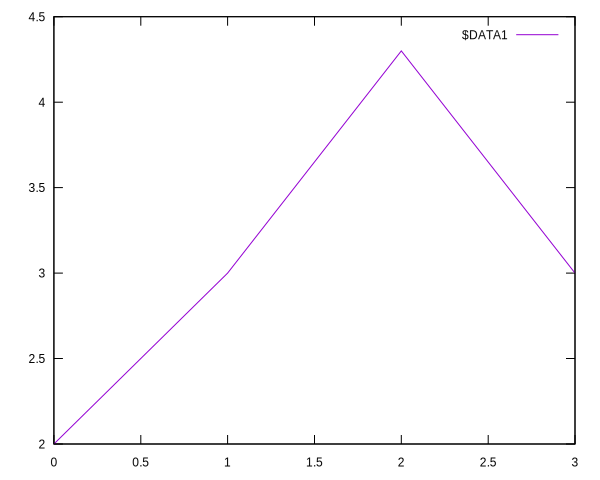

In [21]:
plot1 = GnuplotRB::Plot.new([[2,3,4.3,3], with: 'lines'])

### Multiple graphs on the same plot

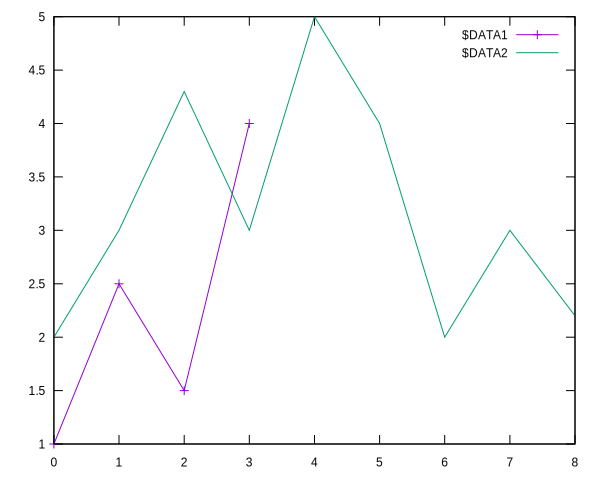

In [22]:
plot2 = GnuplotRB::Plot.new(
  [[1,2.5,1.5,4], with: 'linespoints'],
  [[2,3,4.3,3, 5,4,2,3,2.2], with: 'lines'])

### Plot 3D graphs with Splot

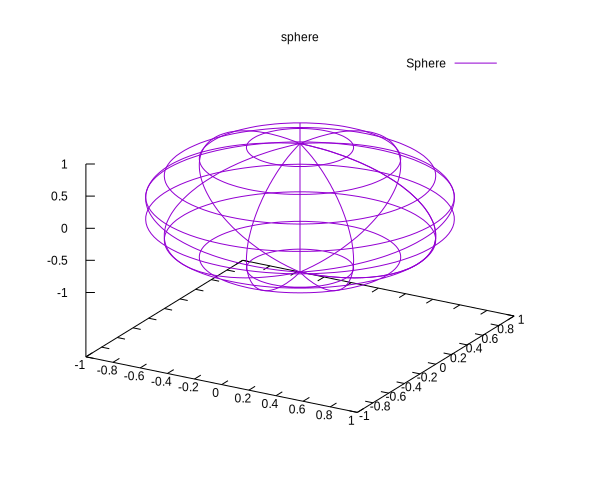

In [23]:
sphere = GnuplotRB::Splot.new(
  ['sin(u)*cos(v), sin(u)*sin(v), cos(u)', title: 'Sphere'],
  parametric: true,
  urange: 0..Math::PI,
  vrange: 0..2*Math::PI,
  title: 'sphere',
)

### Plot a scatter graph for sine wave

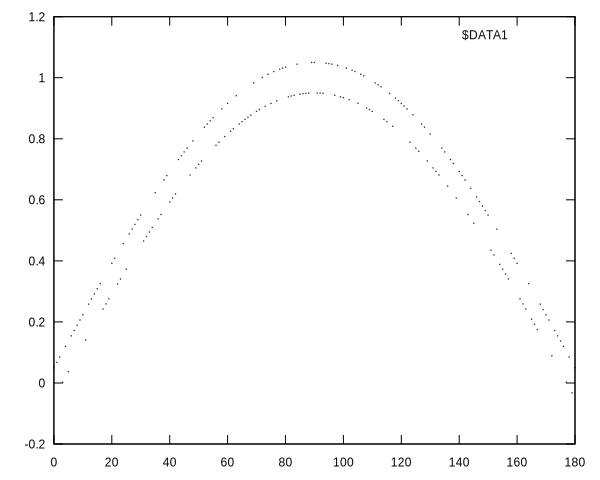

In [24]:
y = (0..180).to_a
r = [0.05,-0.05]
y.map! { |p| Math::sin(p * Math::PI/180) + r.sample }

plot3 = GnuplotRB::Plot.new([y, with: 'dots'])

### Multiple graphs with MultiPlot

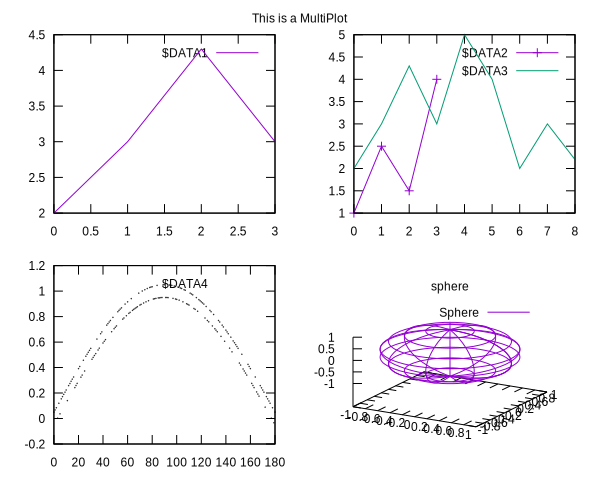

In [25]:
GnuplotRB::Multiplot.new(plot1, plot2, plot3, sphere, layout: [2,2], title: "This is a MultiPlot")